## Table of Contents

- Importing Libraries
- Importing Dataframes
- Exploring Dataframes
- Data Preparation for Regression Analysis
- Regression Analysis

## Importing Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

## Importing Dataframes

In [3]:
# Define path
path = r'/Users/isaacotubanjo/Documents/US Gun Violence Analysis'

In [4]:
path

'/Users/isaacotubanjo/Documents/US Gun Violence Analysis'

In [5]:
# Importing dataframe using os path
df_gun = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'cleaned_gun_violence_data2.pkl'))

## Exploring Dataframes

In [6]:
# Finding the names of columns in the dataframe
df_gun.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address',
       'number_killed', 'number_injured', 'congressional_district',
       'gun_stolen', 'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'number_guns_involved',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_status', 'participant_type', 'state_house_district',
       'state_senate_district'],
      dtype='object')

In [7]:
df_gun.shape

(231432, 22)

In [8]:
df_gun.head(10)

,incident_id,date,state,city_or_county,address,number_killed,number_injured,congressional_district,gun_stolen,gun_type,...,location_description,longitude,number_guns_involved,participant_age,participant_age_group,participant_gender,participant_status,participant_type,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,14.0,NaN,NaN,...,NaN,-79.8559,1.3,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,55.5,20.5
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,43.0,NaN,NaN,...,NaN,-118.3330,1.3,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,9.0,0::Unknown||1::Unknown,0::Unknown||1::Unknown,...,Cotton Club,-82.1377,2.0,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,6.0,NaN,NaN,...,NaN,-104.8020,1.3,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,6.0,0::Unknown||1::Unknown,0::Handgun||1::Handgun,...,NaN,-79.9569,2.0,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,62.0,27.0
5,478948,2013-01-07,Oklahoma,Tulsa,6000 block of South Owasso,4,0,1.0,NaN,NaN,...,Fairmont Terrace,-95.9768,1.3,0::23||1::23||2::33||3::55,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Female||2::Female||3::Female||4:...,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,72.0,11.0
6,479363,2013-01-19,New Mexico,Albuquerque,2806 Long Lane,5,0,1.0,0::Unknown||1::Unknown,0::22 LR||1::223 Rem [AR-15],...,NaN,-106.7160,2.0,0::51||1::40||2::9||3::5||4::2||5::15,0::Adult 18+||1::Adult 18+||2::Child 0-11||3::...,0::Male||1::Female||2::Male||3::Female||4::Fem...,0::Killed||1::Killed||2::Killed||3::Killed||4:...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,10.0,14.0
7,479374,2013-01-21,Louisiana,New Orleans,LaSalle Street and Martin Luther King Jr. Boul...,0,5,2.0,NaN,NaN,...,NaN,-90.0836,1.3,NaN,NaN,0::Male||1::Male||2::Male||3::Male||4::Male,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,93.0,5.0
8,479389,2013-01-21,California,Brentwood,1100 block of Breton Drive,0,4,9.0,NaN,NaN,...,NaN,-121.7180,1.3,NaN,0::Teen 12-17||1::Teen 12-17||2::Teen 12-17||4...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Injured||1::Injured||2::Injured||3::Injured...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,11.0,7.0
9,492151,2013-01-23,Maryland,Baltimore,1500 block of W. Fayette St.,1,6,7.0,NaN,NaN,...,NaN,-76.6412,1.3,0::15,0::Teen 12-17||1::Adult 18+||2::Adult 18+||3::...,0::Male,0::Killed||1::Injured||2::Injured||3::Injured|...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,55.5,44.0


In [9]:
df_gun.describe()

,number_killed,number_injured,congressional_district,latitude,longitude,number_guns_involved,state_house_district,state_senate_district
count,231432.000000,231432.000000,231432.000000,231432.000000,231432.000000,231432.000000,231432.000000,231432.000000
mean,0.246889,0.494059,8.000760,37.546385,-89.338708,1.345008,55.457605,20.480897
std,0.519319,0.731467,8.406878,5.131248,14.363537,3.623289,39.152428,13.433975
min,0.000000,0.000000,0.000000,19.111400,-171.429000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,2.000000,33.903250,-94.160350,1.000000,26.000000,9.000000
50%,0.000000,0.000000,5.000000,38.570100,-86.247850,1.000000,55.500000,20.500000
75%,0.000000,1.000000,10.000000,41.435400,-80.045700,1.300000,78.000000,29.000000
max,50.000000,53.000000,53.000000,71.336800,97.433100,400.000000,901.000000,94.000000


In [10]:
# Checking for missing values
df_gun.isnull().sum()

incident_id                      0
date                             0
state                            0
city_or_county                   0
address                          0
number_killed                    0
number_injured                   0
congressional_district           0
gun_stolen                   99287
gun_type                     99263
incident_characteristics         0
latitude                         0
location_description        191427
longitude                        0
number_guns_involved             0
participant_age              90242
participant_age_group        41094
participant_gender           35538
participant_status           27003
participant_type             24292
state_house_district             0
state_senate_district            0
dtype: int64

## Exploring Dataframes

In [11]:
# First, create a subset containing the relevant columns
df_gun_1 = df_gun[['number_killed', 'number_injured', 'congressional_district', 'latitude', 'longitude', 'number_guns_involved', 'state_house_district', 'state_senate_district']]

In [12]:
# Checking results
df_gun_1

,number_killed,number_injured,congressional_district,latitude,longitude,number_guns_involved,state_house_district,state_senate_district
0,0,4,14.0,40.3467,-79.8559,1.3,55.5,20.5
1,1,3,43.0,33.9090,-118.3330,1.3,62.0,35.0
2,1,3,9.0,41.4455,-82.1377,2.0,56.0,13.0
3,4,0,6.0,39.6518,-104.8020,1.3,40.0,28.0
4,2,2,6.0,36.1140,-79.9569,2.0,62.0,27.0
...,...,...,...,...,...,...,...,...
239671,0,0,5.0,47.6638,-117.2350,1.0,4.0,4.0
239673,1,0,4.0,31.7537,-93.0836,1.0,23.0,31.0
239674,0,1,2.0,29.9239,-90.0442,1.0,85.0,7.0
239675,1,0,9.0,29.7201,-95.6110,1.0,149.0,17.0


In [13]:
# Checking for missing values
df_gun_1.isnull().sum()

number_killed             0
number_injured            0
congressional_district    0
latitude                  0
longitude                 0
number_guns_involved      0
state_house_district      0
state_senate_district     0
dtype: int64

No missing values in the subset.

In [14]:
# Creating a correlation matrix to identify the relationship between variables
df_gun_1.corr()

,number_killed,number_injured,congressional_district,latitude,longitude,number_guns_involved,state_house_district,state_senate_district
number_killed,1.000000,-0.119318,0.055158,-0.079994,-0.062112,-0.021212,-0.005782,-0.010302
number_injured,-0.119318,1.000000,-0.007552,-0.011437,0.036879,-0.029482,-0.028476,-0.042187
congressional_district,0.055158,-0.007552,1.000000,-0.255773,-0.212679,0.015733,0.219489,0.302816
latitude,-0.079994,-0.011437,-0.255773,1.000000,-0.057034,-0.000451,-0.223946,0.026068
longitude,-0.062112,0.036879,-0.212679,-0.057034,1.000000,-0.012713,0.221820,0.102757
number_guns_involved,-0.021212,-0.029482,0.015733,-0.000451,-0.012713,1.000000,-0.002689,0.003208
state_house_district,-0.005782,-0.028476,0.219489,-0.223946,0.221820,-0.002689,1.000000,0.417357
state_senate_district,-0.010302,-0.042187,0.302816,0.026068,0.102757,0.003208,0.417357,1.000000


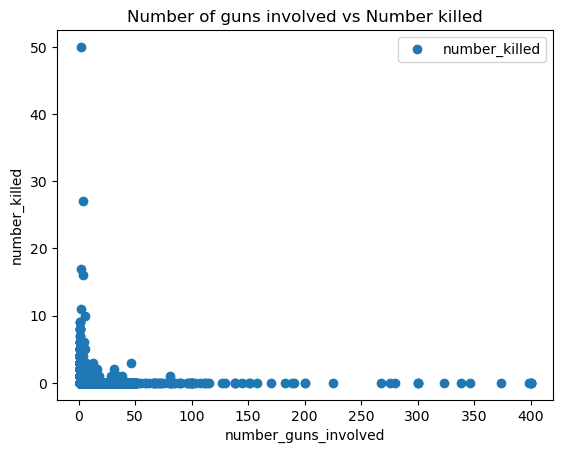

In [16]:
# Creating a scatterplot for the "number_guns_involved" and "number_killed" columns

df_gun_1.plot(x = 'number_guns_involved', y='number_killed',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Number of guns involved vs Number killed')  
plt.xlabel('number_guns_involved')  
plt.ylabel('number_killed')  
plt.show()

## Data Preparation for Regression Analysis

In [17]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_gun_1['number_guns_involved'].values.reshape(-1,1)
y = df_gun_1['number_killed'].values.reshape(-1,1)

In [18]:
X

array([[1.3],
       [1.3],
       [2. ],
       ...,
       [1. ],
       [1. ],
       [2. ]])

In [19]:
y

array([[0],
       [1],
       [1],
       ...,
       [0],
       [1],
       [2]])

In [20]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Regression Analysis

In [21]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [22]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [23]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

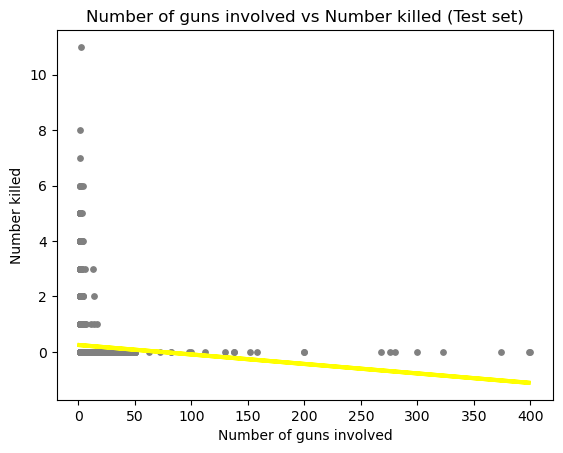

In [24]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='yellow', linewidth =3)
plot_test.title('Number of guns involved vs Number killed (Test set)')
plot_test.xlabel('Number of guns involved')
plot_test.ylabel('Number killed')
plot_test.show()

In [25]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [26]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00342056]]
Mean squared error:  0.25673549557921116
R2 score:  0.0003805491349808676


The slope value here (-0.00342056) indicates that the relationship is negative. The mean squared error indicates that the model is inaccurate and this could be due to the presence of high values. The regression line is quite distant from a number of points. The r-squared value is also very low which shows that overall, this model is not a good fit. I guess this confirms my previous assertion that there is no correlation between both variables.

In [27]:
y_predicted

array([[0.24779953],
       [0.24677336],
       [0.24779953],
       ...,
       [0.24677336],
       [0.24677336],
       [0.24779953]])

In [28]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1,0.247800
1,0,0.246773
2,0,0.247800
3,0,0.247800
4,0,0.246773
5,0,0.246773
6,0,0.247800
7,0,0.247800
8,0,0.247800
9,0,0.246773


The values here also shows that the prediction is very different from the real values.

I will try this again using the congressional district and state senate district columns as they have the highest correlations.

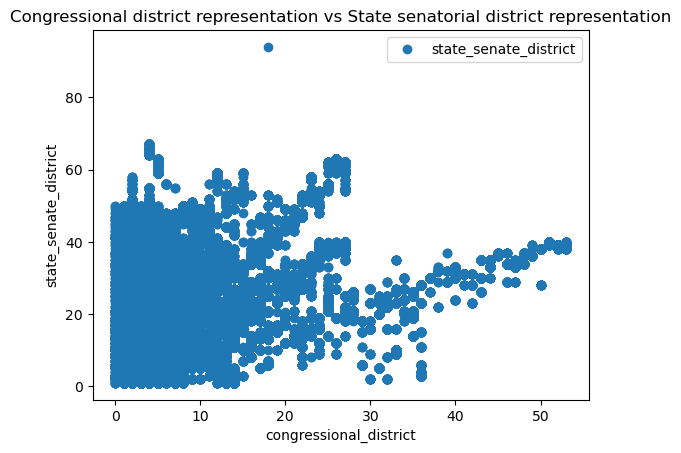

In [46]:
# Creating a scatterplot for the "congressional_district" and "state_senate_district" columns

df_gun_1.plot(x = 'congressional_district', y='state_senate_district',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Congressional district representation vs State senatorial district representation')  
plt.xlabel('congressional_district')  
plt.ylabel('state_senate_district')  
plt.show()

In [47]:
#  Reshape the variables into NumPy arrays and put them into separate objects.

X = df_gun_1['congressional_district'].values.reshape(-1,1)
y = df_gun_1['state_senate_district'].values.reshape(-1,1)

In [48]:
X

array([[14.],
       [43.],
       [ 9.],
       ...,
       [ 2.],
       [ 9.],
       [ 2.]])

In [49]:
y

array([[20.5],
       [35. ],
       [13. ],
       ...,
       [ 7. ],
       [17. ],
       [ 3. ]])

In [50]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [51]:
# Create a regression object.

regression = LinearRegression() 

In [52]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [53]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

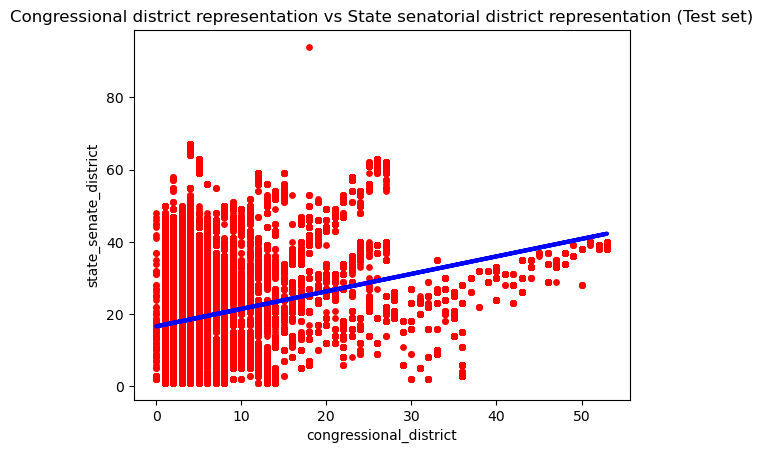

In [54]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='red', s = 15)
plot_test.plot(X_test, y_predicted, color='blue', linewidth =3)
plot_test.title('Congressional district representation vs State senatorial district representation (Test set)')
plot_test.xlabel('congressional_district')
plot_test.ylabel('state_senate_district')
plot_test.show()

In [55]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [56]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.4842553]]
Mean squared error:  163.10284398299444
R2 score:  0.09256116607607345


Here, slope value here (0.4842553) indicates that the relationship is positive and much stronger. The mean squared error indicates that the model is also inaccurate. The regression line is very distant from a number of points with an outlier value well out of range. The r-squared value is also low which shows that overall, this model is not a good fit even though it is a much better fit than the previous one. There is no strong correlation between both variables.

In [57]:
y_predicted

array([[17.09587811],
       [17.09587811],
       [20.00140993],
       ...,
       [18.06438872],
       [17.09587811],
       [20.96992053]])

In [58]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,4.0,17.095878
1,21.0,17.095878
2,3.0,20.001410
3,20.5,20.001410
4,33.0,20.001410
5,10.0,18.064389
6,26.0,33.560558
7,5.0,21.454176
8,21.0,21.938431
9,4.0,18.548644


There are also variations between the actual and predicted values. This model is not a good fit.